# Task 1: EDA

## This notebooks covers the EDA for the set of data provided. Our aim is to derive the best possible insights from the data and to understand the data better in order to help the company in making better decisions for their business.

### Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np


### Data Handling

#### Handling the date time columns is crucial and is most common pitfall for initial errors

In [ ]:
# Load data and perform initial transformations
customer_info = customers_df
product_info = products_df
sales_data = transactions_df

# Parse date columns for better analysis
customer_info['SignupDate'] = pd.to_datetime(customer_info['SignupDate'])
sales_data['TransactionDate'] = pd.to_datetime(sales_data['TransactionDate'])

In [7]:
# Combine datasets to create a unified view
combined_data = sales_data.merge(customer_info, on='CustomerID', how='left')
combined_data = combined_data.merge(product_info, on='ProductID', how='left')

Total Revenue Generated: $689,995.56
Average Transaction Value: $690.00
Number of Unique Customers: 199
Number of Products Sold: 100
Top-Selling Category: Books


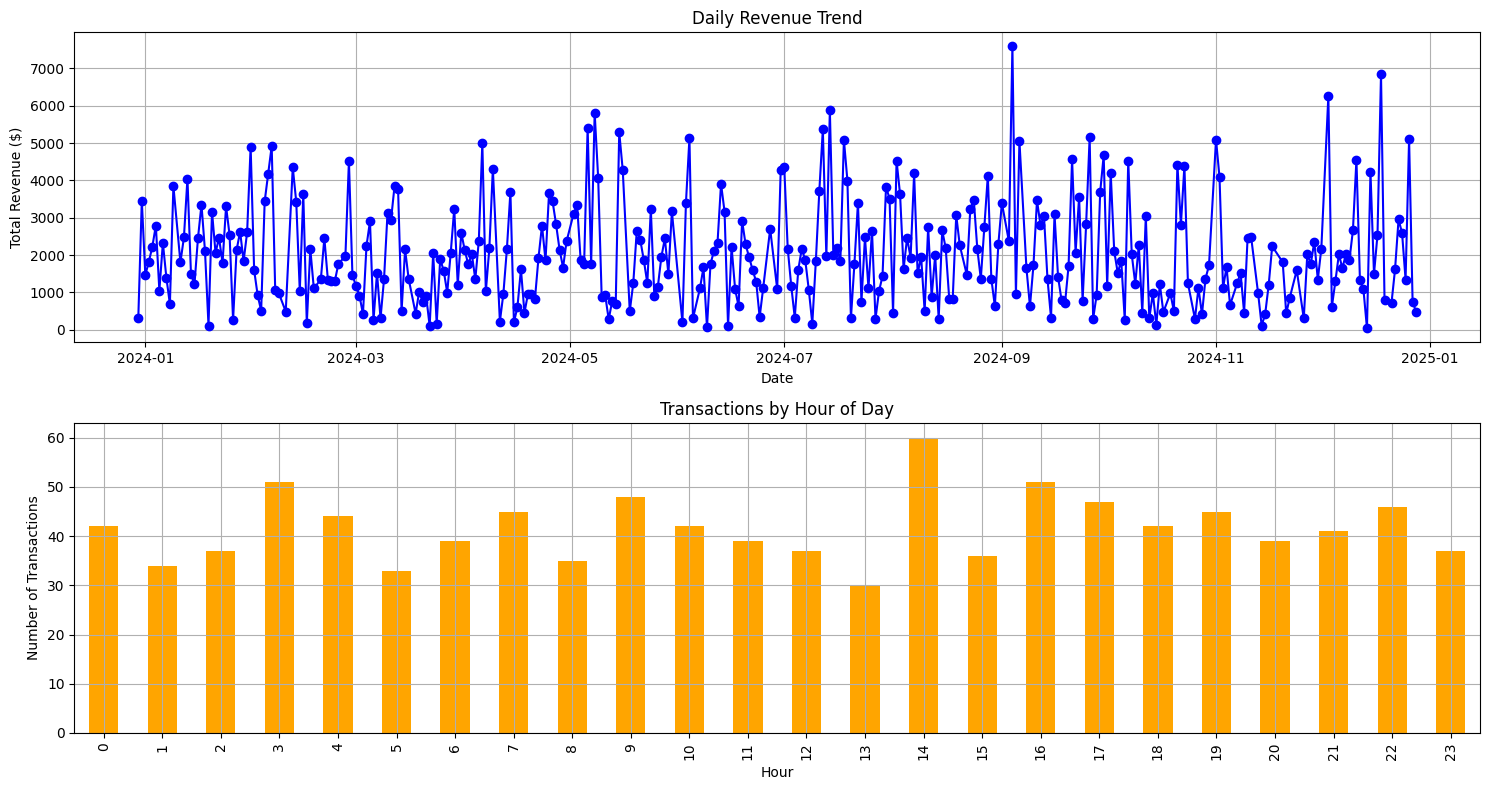

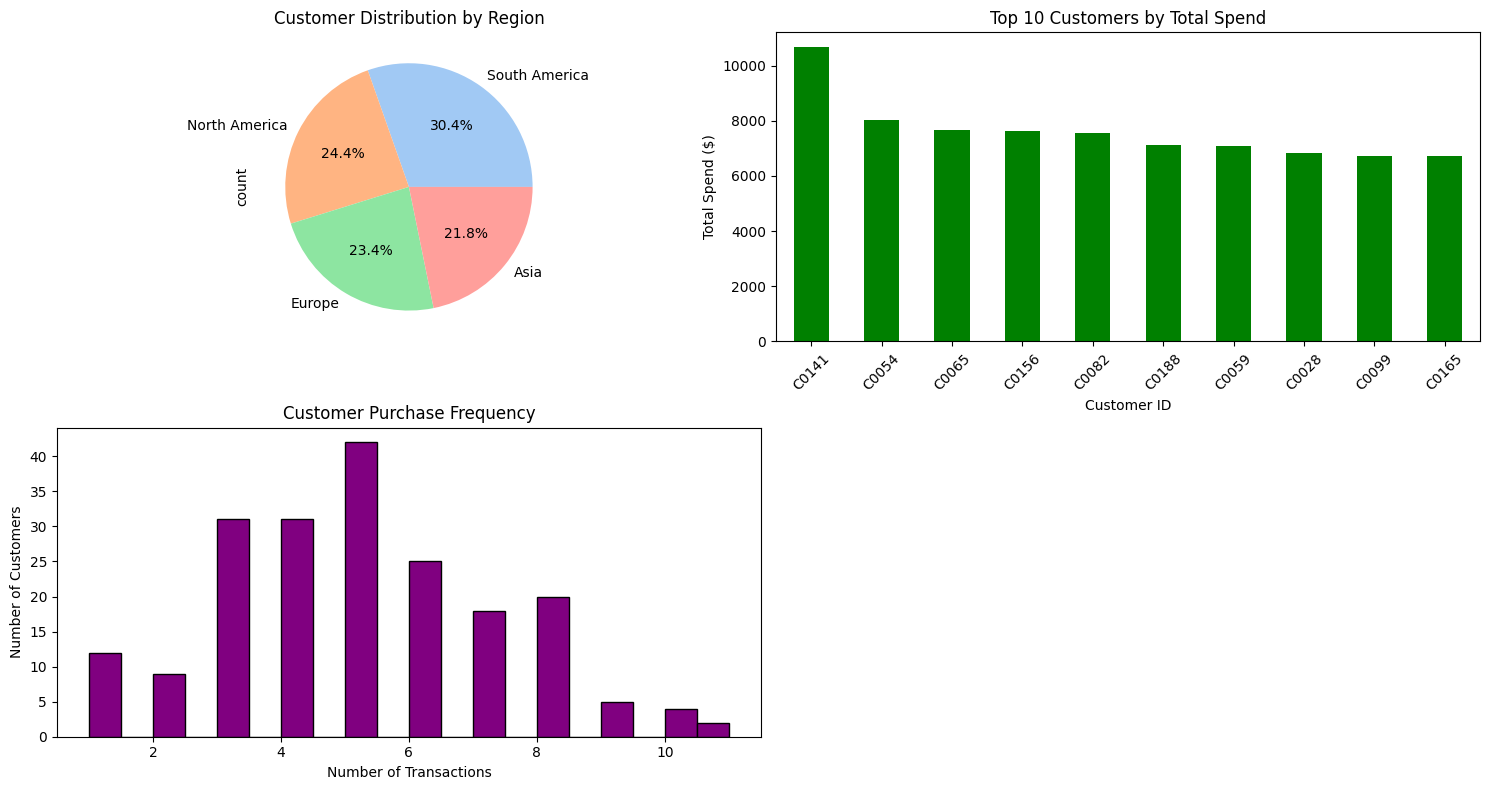

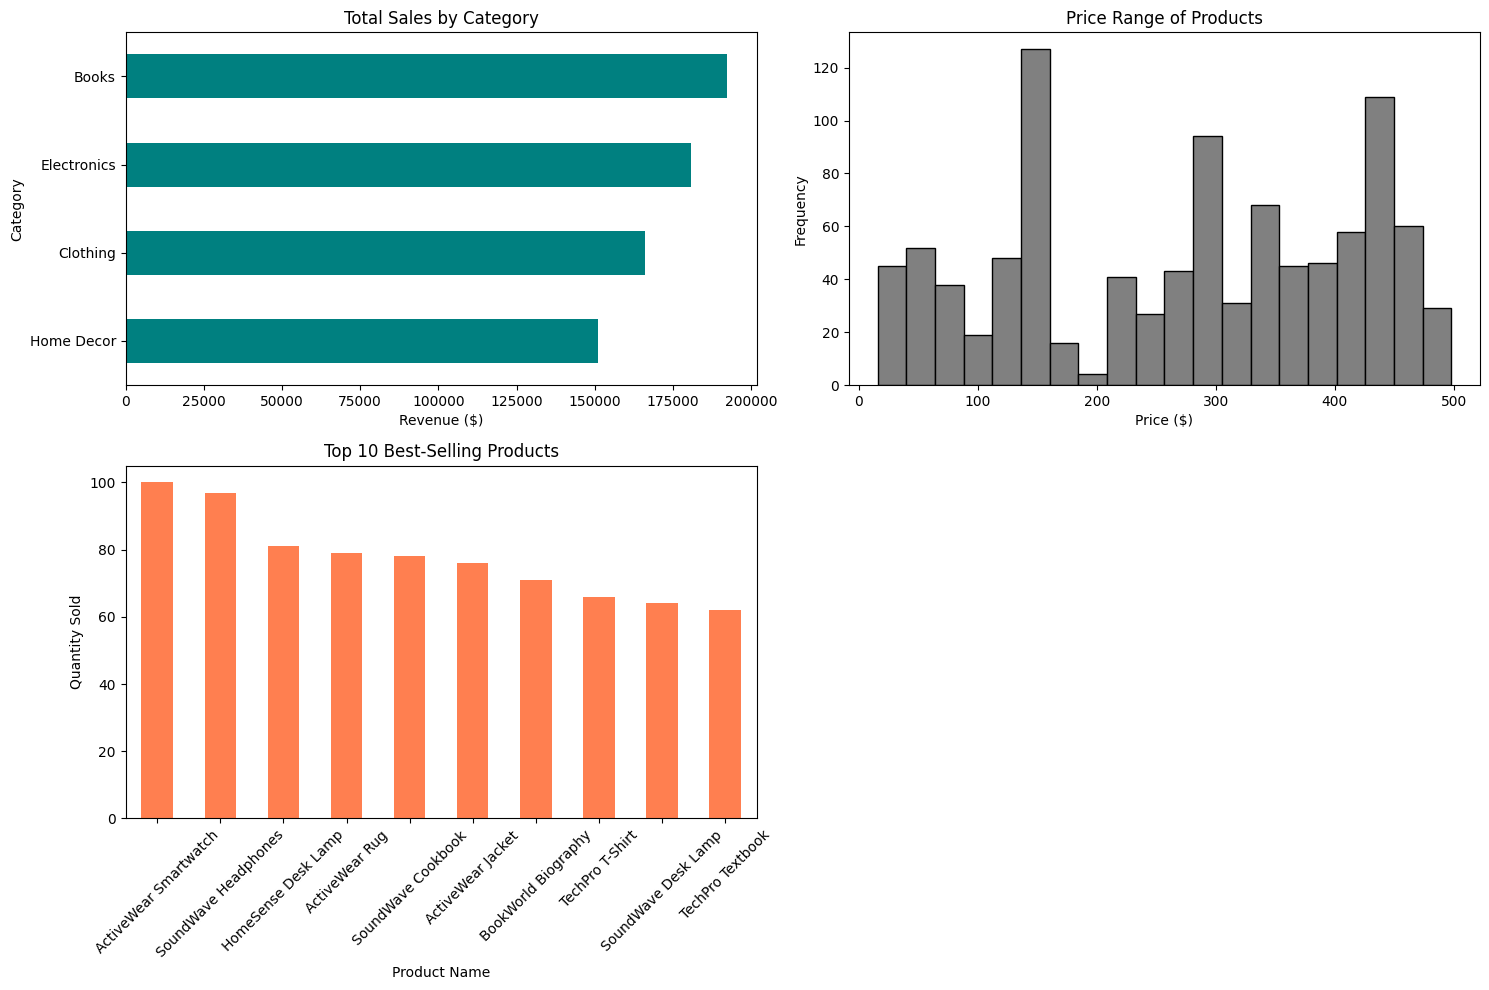

In [ ]:



# Combine datasets to create a unified view
combined_data = sales_data.merge(customer_info, on='CustomerID', how='left')
combined_data = combined_data.merge(product_info, on='ProductID', how='left')

def analyze_time_patterns(data):
    """Explore how transactions vary across time periods."""
    plt.figure(figsize=(15, 8))

    # Aggregate daily revenue
    daily_revenue = data.groupby(data['TransactionDate'].dt.date)['TotalValue'].sum()

    plt.subplot(2, 1, 1)
    daily_revenue.plot(kind='line', marker='o', color='blue')
    plt.title('Daily Revenue Trend')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue ($)')
    plt.grid(True)

    # Hourly transaction distribution
    plt.subplot(2, 1, 2)
    data['HourOfDay'] = data['TransactionDate'].dt.hour
    hourly_transactions = data.groupby('HourOfDay')['TransactionID'].count()
    hourly_transactions.plot(kind='bar', color='orange')
    plt.title('Transactions by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Number of Transactions')
    plt.grid(True)

    plt.tight_layout()
    return plt

def analyze_customer_segments(data):
    """Dive into customer behavior and regional trends."""
    plt.figure(figsize=(15, 8))

    # Distribution by region
    plt.subplot(2, 2, 1)
    data['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title('Customer Distribution by Region')

    # Top 10 customers by spending
    top_spenders = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
    plt.subplot(2, 2, 2)
    top_spenders.head(10).plot(kind='bar', color='green')
    plt.title('Top 10 Customers by Total Spend')
    plt.xlabel('Customer ID')
    plt.ylabel('Total Spend ($)')
    plt.xticks(rotation=45)

    # Frequency of purchases per customer
    customer_purchases = data.groupby('CustomerID')['TransactionID'].count()
    plt.subplot(2, 2, 3)
    plt.hist(customer_purchases, bins=20, color='purple', edgecolor='black')
    plt.title('Customer Purchase Frequency')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Number of Customers')

    plt.tight_layout()
    return plt

def evaluate_product_performance(data):
    """Review product trends and sales performance."""
    plt.figure(figsize=(15, 10))

    # Revenue by product category
    category_revenue = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=True)
    plt.subplot(2, 2, 1)
    category_revenue.plot(kind='barh', color='teal')
    plt.title('Total Sales by Category')
    plt.xlabel('Revenue ($)')

    # Product price distribution
    plt.subplot(2, 2, 2)
    plt.hist(data['Price_y'], bins=20, color='grey', edgecolor='black')
    plt.title('Price Range of Products')
    plt.xlabel('Price ($)')
    plt.ylabel('Frequency')

    # Top 10 products sold by quantity
    top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
    plt.subplot(2, 2, 3)
    top_products.head(10).plot(kind='bar', color='coral')
    plt.title('Top 10 Best-Selling Products')
    plt.xlabel('Product Name')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45)

    plt.tight_layout()
    return plt

# Generate visuals for analysis
time_visuals = analyze_time_patterns(combined_data)
customer_visuals = analyze_customer_segments(combined_data)
product_visuals = evaluate_product_performance(combined_data)

# Calculate key metrics and summarize findings
business_summary = {
    'Total Revenue Generated': f"${combined_data['TotalValue'].sum():,.2f}",
    'Average Transaction Value': f"${combined_data['TotalValue'].mean():,.2f}",
    'Number of Unique Customers': combined_data['CustomerID'].nunique(),
    'Number of Products Sold': combined_data['ProductID'].nunique(),
    'Top-Selling Category': combined_data.groupby('Category')['Quantity'].sum().idxmax()
}

# Print business summary
for key, value in business_summary.items():
    print(f"{key}: {value}")


In [10]:
#Revenue Generated through Books, Electronics, and Clothing and Home Decor
revenue_by_category = combined_data.groupby('Category')['TotalValue'].sum()
#print the results of the revenue generated through Books, Electronics, and Clothing and Home Decor
print("Revenue In Dollars $")
print(revenue_by_category)


Revenue In Dollars $
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64
